In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

%pylab inline

C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [7]:
data = pd.read_csv('monthly-milk-production.csv', ';', index_col='month', parse_dates=['month'], dayfirst=True)
data.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


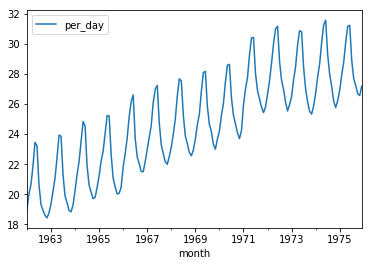

In [8]:
average_per_day = data.milk / data.index.days_in_month
data['per_day'] = average_per_day
data.plot(y='per_day')

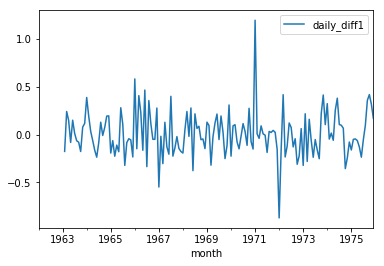

In [9]:
data['daily_diff1'] = data.per_day - data.per_day.shift(12)
data['daily_diff1'] = data.daily_diff1 - data.daily_diff1.shift(1)
data.plot(y='daily_diff1')

In [10]:
data.daily_diff1.notnull().value_counts()

True     155
False     13
Name: daily_diff1, dtype: int64

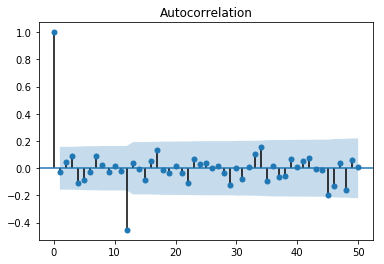

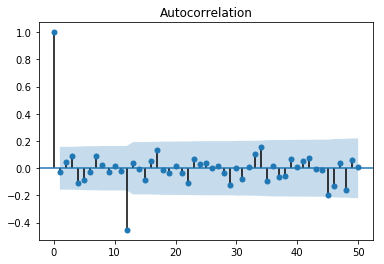

In [11]:
sm.graphics.tsa.plot_acf(data[data.daily_diff1.notnull()].daily_diff1.values.squeeze(), lags=50)

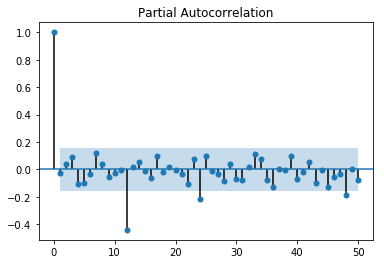

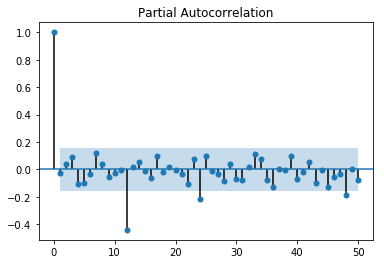

In [12]:
sm.graphics.tsa.plot_pacf(data[data.daily_diff1.notnull()].daily_diff1.values.squeeze(), lags=50)